In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

In [ ]:
data = pd.read_csv(url)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.shape

(10886, 12)

In [ ]:
#Statistical summary
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#checking null values
data.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
#checking data type of all attributes
data.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
#Checking duplictes
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10881,False
10882,False
10883,False
10884,False


##Analyzing the distribution of Numerical & Categorical variables, separately

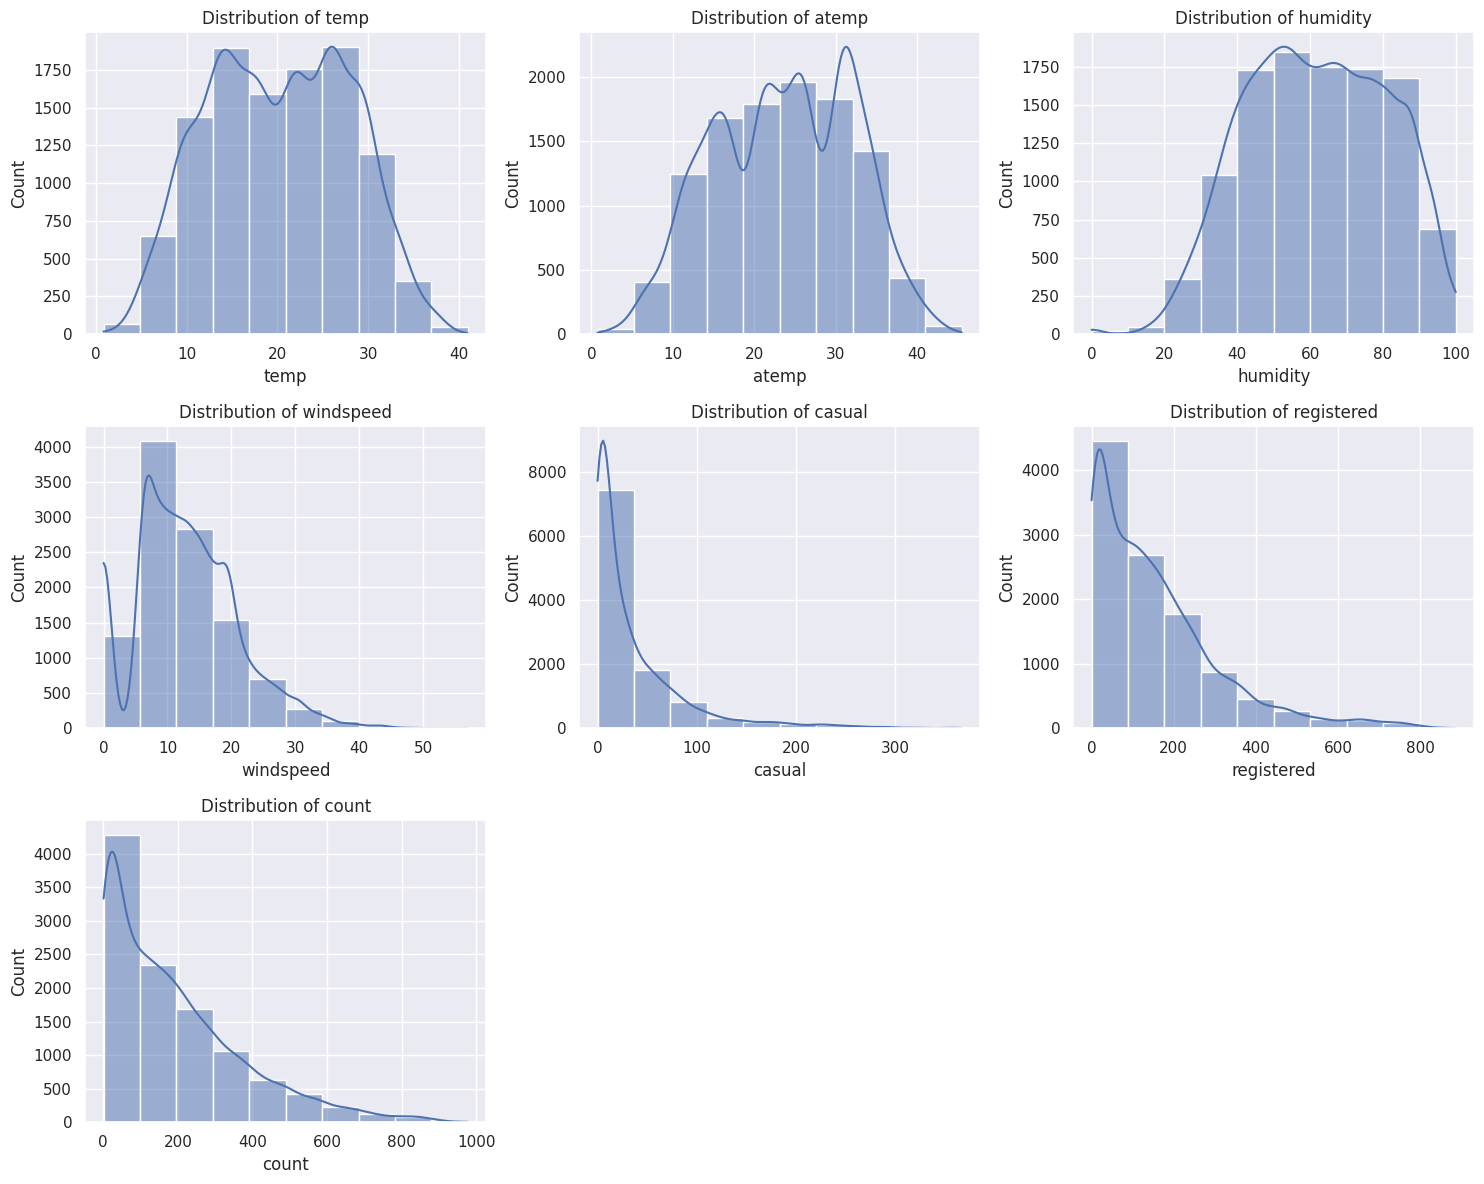

In [ ]:
#for numerical columns
numerical_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15,12))

for i, feature in enumerate(numerical_col, 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[feature], kde=True, bins=10)
  plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

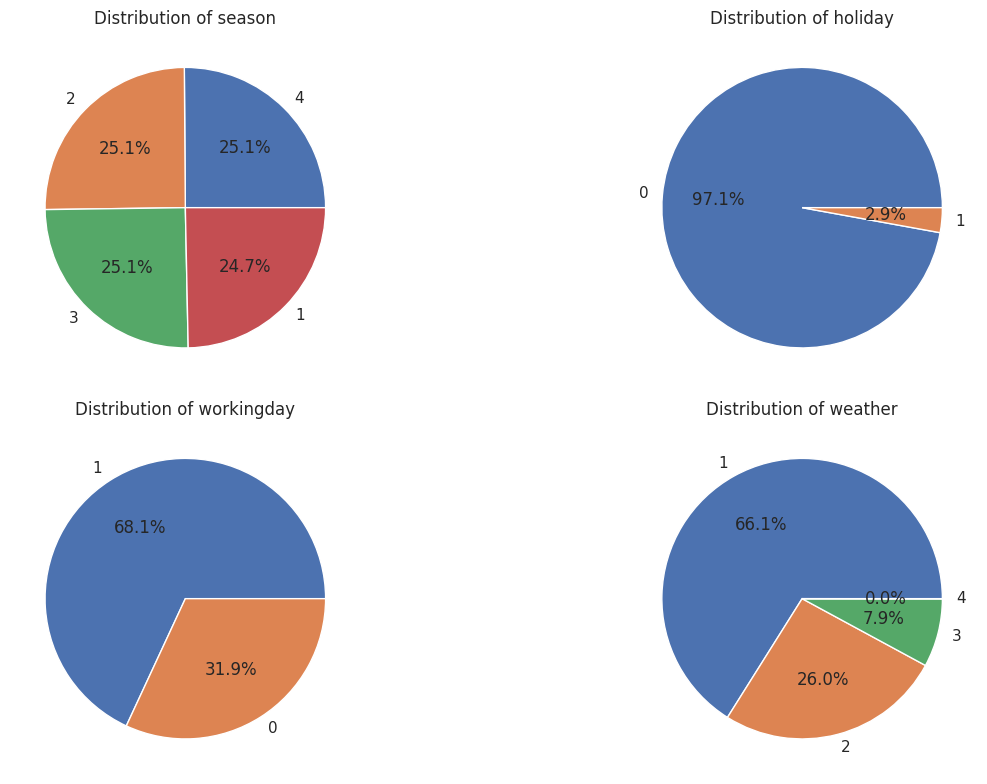

In [ ]:
#for categorical columns
categorical_col = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(15,8))

for i, feature in enumerate(categorical_col, 1):
  plt.subplot(2, 2, i)
  plt.pie(data[feature].value_counts(), labels=data[feature].value_counts().index, autopct='%1.1f%%')
  plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

##Checking for Outliers and dealing with them accordingly.


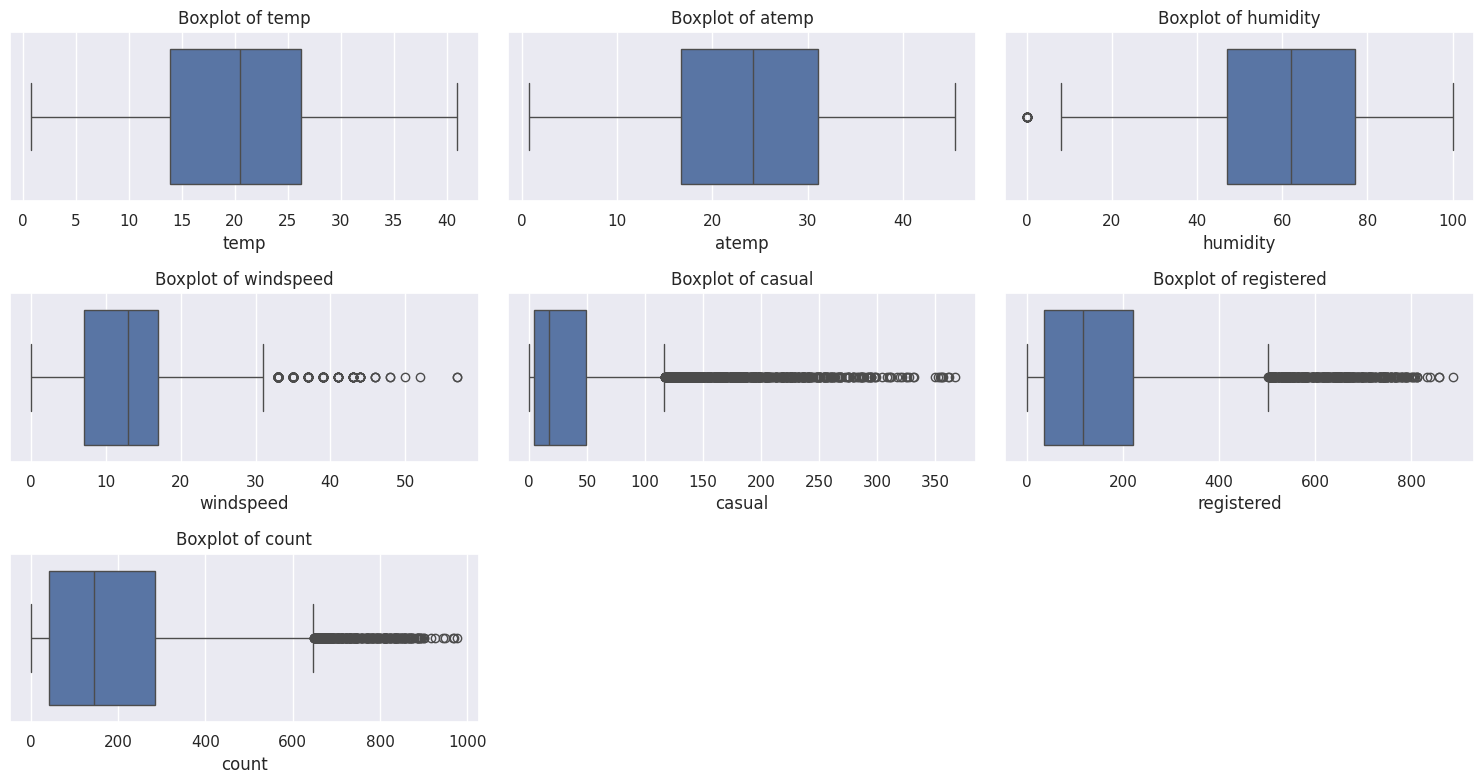

In [ ]:
numerical_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15,8))

for i, feature in enumerate(numerical_col, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x=data[feature])
  plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
numerical_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

Q1 = data[numerical_col].quantile(0.25)
Q3 = data[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data[numerical_col] < lower_bound) | (data[numerical_col] > upper_bound)

print(outliers.sum())

temp            0
atemp           0
humidity       22
windspeed     227
casual        749
registered    423
count         300
dtype: int64


In [ ]:
#Data with no outliers
df_new = data[~outliers.any(axis=1)]
df_new

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


##Establishing a Relationship between the Dependent and Independent Variables.

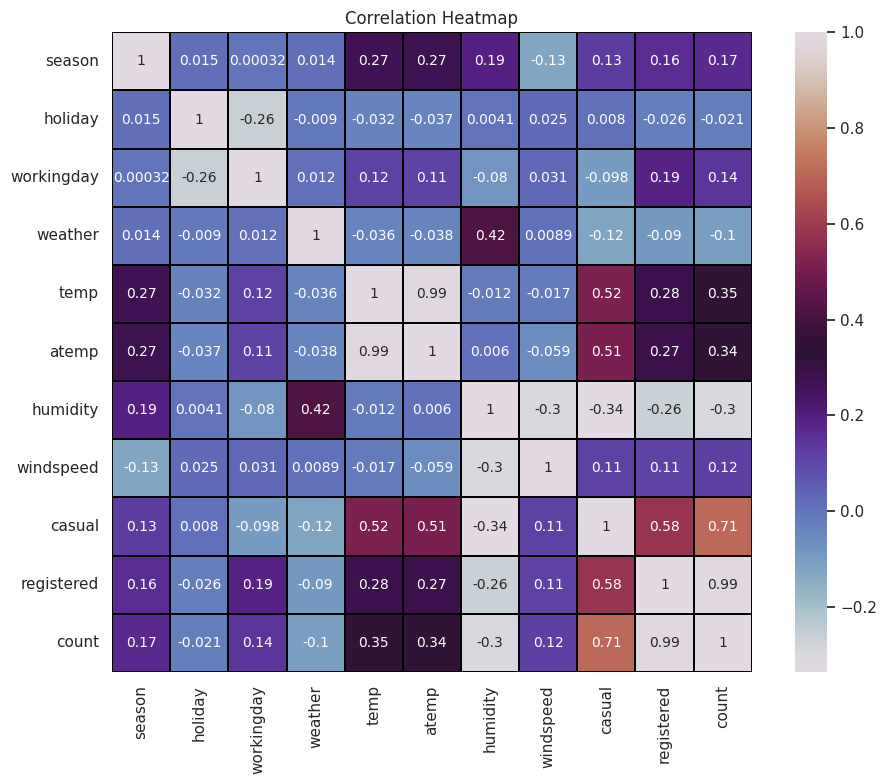

In [ ]:
from scipy.stats import pearsonr

numerical_col = ['season','holiday','workingday',	'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

sns.set(font_scale=1)
plt.figure(figsize=(10,8))

correlation_values = df_new[numerical_col].corr(method = 'pearson')

sns.heatmap(correlation_values, linewidths=0.05, square= True, annot=True, cmap="twilight", linecolor="black",annot_kws={"size": 10})

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##Insights from Heatmap

1. temp and atemp are strongly positive correlated to each other which is close to 1.

2. count and regisered are strongly positive correlated to each other which is close to 1.

3. humidity shows a negative correlation with count, registered, casual, windspeed and temp which means people tend to use less yulu bikes due to humidity.

4. count and workingday indicates a weak positive correlation.

5. count and weather indicated a weak negative correlation.

6. count and season indicates a weak positive correlation.


In [ ]:
#Removing the highly correlated variables

high_corr_pairs = correlation_values[correlation_values > 0.8].stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

print("Highly Correlated Pairs (correlation > 0.8):")
print(high_corr_pairs)

Highly Correlated Pairs (correlation > 0.8):
      Feature1    Feature2  Correlation
5         temp       atemp     0.986415
6        atemp        temp     0.986415
12  registered       count     0.985967
13       count  registered     0.985967


##Significant difference between the no. of bike rides on Weekdays and Weekends?

In [ ]:
# Null Hypothesis (H0) = No significant difference between the no. of bike rides on Weekdays and Weekends
# Alternate Hypothesis (H1) = Significant difference between the no. of bike rides on Weekdays and Weekends

In [ ]:
# 2-Sample Independent T-test
# significance level = 5%

In [ ]:
from scipy.stats import ttest_ind

weekdays = df_new[df_new['workingday'] == 1]['count']
weekends = df_new[df_new['workingday'] == 0]['count']

t_stat, pvalue = ttest_ind(weekdays, weekends)

print(f"T_statistics: {t_stat}")
print(f"P-value: {pvalue}")

T_statistics: 13.983019373271851
P-value: 5.384896180235767e-44


In [ ]:
alpha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, there is significant difference between the no. of bike rides on Weekdays and Weekends")
else:
  print('Fail to reject the null hypothesis, there is no significant difference between the no. of bike rides on Weekdays and Weekends')


Reject the null hypothesis, there is significant difference between the no. of bike rides on Weekdays and Weekends


###Inferences & Conclusions from the above analysis and Recommendations

---


*  Since pvalue is less than alpha we reject null hypothesis and conclude that there is significant difference between the no. of bike rides on Weekdays and Weekends

Recommendations:

1. Offer weekend discounts or promotions for casual riders (tourists or leisure riders).

2. Increase bike availability in commercial areas during weekdays.

3. Increase bikes near parks, tourist spots, or recreational areas on weekends.

4. Strategic recommendations include targeted promotions, optimizing bike placement, and customizing user engagement strategies to maximize bike rentals during peak times, especially on weekends.



##Demand of bicycles on rent is the same for different Weather conditions or not

In [ ]:
# Null Hypothesis (H0) = Demand of bicycles is same for different weather conditions
# Alternate Hypothesis (H1) = Demand of bicycles is not same for different weather conditions

In [ ]:
# Kruskal Wallis Test
# Significance level = 5%

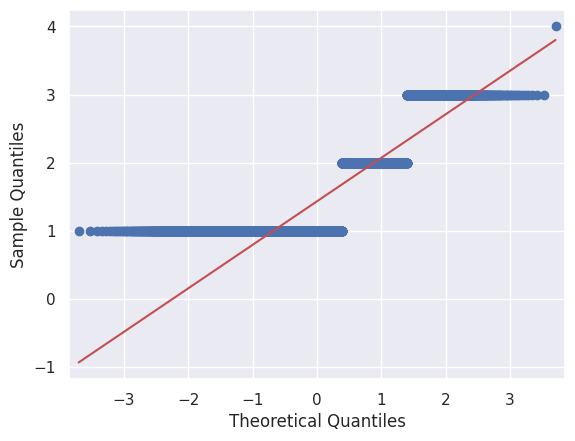

In [ ]:
# Test for normality (visual method using QQ plot)

from statsmodels.graphics.gofplots import qqplot

qqplot(df_new['weather'], line="s")
plt.show()

# The data is not normally distributed.

In [ ]:
# Test for equal variance (Levene's test)

from scipy.stats import levene

clear = df_new[df_new['weather']==1]['count']
cloudy = df_new[df_new['weather']==2]['count']
light = df_new[df_new['weather']==3]['count']
heavy = df_new[df_new['weather']==4]['count']

stats, pvalue = levene(clear, cloudy, light, heavy)

print(f"Statistics: {stats}")
print(f"P-value: {pvalue}")

alpha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, there is no equality variance")
else:
  print("Fail to reject the null hypothesis, there is equality variance")

Statistics: 43.7279017358368
P-value: 4.67345079664337e-28
Reject the null hypothesis, there is no equality variance


In [ ]:
#Since data is not normally distributed will use Kruskal Wallis Test to check demand of bicycles on rent is the same for different Weather conditions or not.

from scipy.stats import kruskal

stats, pvalue = kruskal(clear, cloudy, light, heavy)

print(f"Statistics : {stats}")
print(f"P-value : {pvalue}")

Statistics : 115.95354025348767
P-value : 5.738374025114387e-25


In [ ]:
alpha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, Demand of bicycles on rent is not same for different weather conditions")
else:
  print("Fail to reject the null hypothesis, Demand of bicycles on rent is same for different weather conditions")

Reject the null hypothesis, Demand of bicycles on rent is not same for different weather conditions


###Inferences & Conclusions from the above analysis and Recommendations

---


*  Since pvalue is less than alpha we reject null hypothesis and conclude that demand of biycles on rent is not same for different weather conditions.

Recommendations:

*   Based on the analysis, bicycle rental demand significantly varies by weather conditions. We recommend aligning inventory and staff based on weather forecasts, introducing dynamic pricing, offering promotions during rainy periods, and prioritizing maintenance during low-demand days. Additionally, marketing campaigns should target sunny days to maximize rentals and encourage rainy-day rentals with discounts and weather-appropriate gear.



##Demand of bicycles on rent is the same for different Seasons or not

In [ ]:
# Null Hypothesis (H0) = Demand of bicycles is same for different seasons
# Alternate Hypothesis (H1) = Demand of bicycles is not same for different seasons

In [ ]:
#Kruskal Wallis Test
#Significance level = 5%

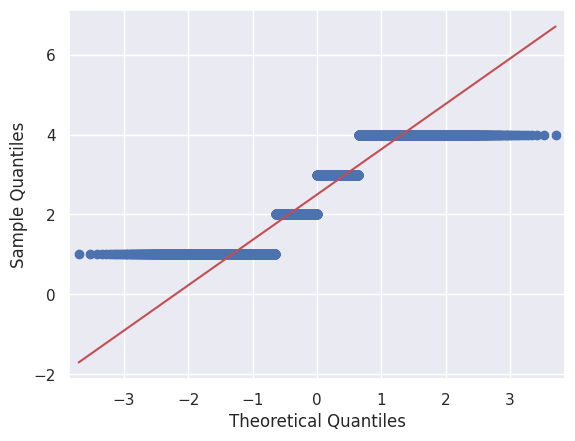

In [ ]:
# Test for normality (visual method using QQ plot)

from statsmodels.graphics.gofplots import qqplot

qqplot(df_new['season'], line="s")
plt.show()

In [ ]:
#Test for normality (Shapiro Wilk Test)

spring = df_new[df_new['season']==1]['count']
summer = df_new[df_new['season']==2]['count']
fall = df_new[df_new['season']==3]['count']
winter = df_new[df_new['season']==4]['count']

from scipy.stats import shapiro

stats_spring, pvalue = shapiro(spring)
print(f"Statistics: {stats_spring}")
print(f"P-value: {pvalue}")

stats_summer, pvalue = shapiro(summer)
print(f"Statistics: {stats_summer}")
print(f"P-value: {pvalue}")

stats_fall, pvalue = shapiro(fall)
print(f"Statistics: {stats_fall}")
print(f"P-value: {pvalue}")

stats_winter, pvalue = shapiro(winter)
print(f"Statistics: {stats_winter}")
print(f"P-value: {pvalue}")

aplha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, data is not normally distributed")
else:
  print("Fail to reject the null hypothesis, data is normally distributed")


Statistics: 0.8594162572439491
P-value: 2.0714964386977434e-42
Statistics: 0.9176211867361624
P-value: 1.2427934617894426e-33
Statistics: 0.9323315634508154
P-value: 5.116183352101777e-31
Statistics: 0.9272510644231388
P-value: 4.520785730802546e-33
Reject the null hypothesis, data is not normally distributed


In [ ]:
#Test for equal variance (Levene's Test)

spring = df_new[df_new['season']==1]['count']
summer = df_new[df_new['season']==2]['count']
fall = df_new[df_new['season']==3]['count']
winter = df_new[df_new['season']==4]['count']

from scipy.stats import shapiro

stats, pvalue = levene(spring, summer, fall, winter)
print(f"Statistics: {stats}")
print(f"P-value: {pvalue}")

aplha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, data is not normally distributed")
else:
  print("Fail to reject the null hypothesis, data is normally distributed")

Statistics: 137.00312941554566
P-value: 6.687186315723853e-87
Reject the null hypothesis, data is not normally distributed


In [ ]:
#Since data is not normally distributed will use Kruskal Wallis Test to check demand of bicycles on rent is the same for different Seasons or not.

from scipy.stats import kruskal

stats, pvalue = kruskal(spring, summer, fall, winter)

print(f"Statistics : {stats}")
print(f"P-value : {pvalue}")

Statistics : 429.4814657501883
P-value : 9.092946705054743e-93


In [ ]:
alpha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, Demand of bicycles on rent is not same for different seasons")
else:
  print("Fail to reject the null hypothesis, Demand of bicycles on rent is same for different seasons")

Reject the null hypothesis, Demand of bicycles on rent is not same for different seasons


###Inferences & Conclusions from the above analysis and Recommendations

---

*  Since pvalue is less than alpha we reject null hypothesis and conclude that demand of biycles on rent is not same for different seasons.

Recommendations:

1. Increase prices during peak seaons due to high demand in spring and summer.

2. Implement discounts, deals and cut-off prices in fall and winter due to low demand.

3. Ensure high availability of bikes during peak seasons and reduce inventore during low time.

4. Collaborate with cafes or outdoor retailers at peak time, such as "Rent a bike and get 10% off at a local café".

5. Partner with indoor activity centers (e.g., gyms, indoor cycling studios) for cross-promotions.




##Weather conditions are significantly different during different Seasons or not

In [ ]:
# Null Hypothesis (H0) = Weather conditions are same during different Seasons
# Alternate Hypothesis (H1) = Weather conditions are not same during different Seasons

In [ ]:
# Chi-squre Test
# Significance level = 5%

In [ ]:
# Contingency Table against ‘Weather’ & ‘Season’ columns

contingency_table = pd.crosstab(df_new['weather'], df_new['season'], margins=True)
contingency_table

season,1,2,3,4,All
weather,,,,,
1,1595,1473,1598,1510,6176
2,683,614,517,754,2568
3,184,205,173,211,773
4,1,0,0,0,1
All,2463,2292,2288,2475,9518


In [ ]:
from scipy.stats import chi2_contingency

stats, pvalue, dof, expected =chi2_contingency(contingency_table)

print(f"Statistics: {stats}")
print(f"P-value: {pvalue}")

Statistics: 49.956607077688595
P-value: 2.329256971000744e-05


In [ ]:
alpha = 0.05
if pvalue < alpha:
  print("Reject the null hypothesis, Weather conditions are not same during different Seasons ")
else:
  print("Fail to reject the null hypothesis, Weather conditions are same during different Seasons ")

Reject the null hypothesis, Weather conditions are not same during different Seasons 


###Inferences & Conclusions from the above analysis and Recommendations

---

*  Since pvalue is less than alpha we reject null hypothesis and conclude that Weather conditions are not same during different Seasons.

Recommendations:
* Since the weather conditions differ significantly across seasons, we recommend adjusting the rental fleet and services accordingly. During warmer seasons, increase inventory and promote outdoor activities, while offering weather-related discounts and seasonal gear during colder months. Additionally, dynamic pricing, seasonal marketing campaigns, and diversified offerings will help maintain customer engagement year-round.

